# F75 Computer and Data processing 

Experiment carried out by Mathieu Kaltschmidt and Quirinus Schwarzenböck at INF 501 in Heidelberg on the week of February 18th 2019. <br>

__Supervisor:__ Fabrizio Napolitano  <br>

In [2]:
#Useful packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma

#Plot settings
plt.style.use('seaborn-talk')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

### Part A: Visualizing and fitting the resonance curves 

In [3]:
#Defining the Lorentz curve
def Lorentzian(omega, A0, omega0, gamma):
    return A0 / np.sqrt((omega0**2 - omega**2)**2 + gamma**2 * omega**2)

#Phase difference 
def phi(omega, omega0, gamma, test, offset):
    return np.arctan((gamma* (omega-test)) / (omega0**2 - (omega-test)**2) ) + offset

#Calculating the residuals
def residual(measured, fitvals, errors):
    residuals = []
    for i in range(len(measured)):
        residuals.append( (measured[i] - fitvals[i]) / errors[i] )
    return np.array(residuals)

### Analyzing the measurement for $\nu_0$

In [4]:
#Loading DATA
amp0, amp0_dev, phase0, phase0_dev, freq0 =  np.loadtxt(r'DATA/PartA/data0.txt', skiprows=1, unpack=True)

#Fitting the Lorentz curve
popt_amp0, pcov_amp0 = curve_fit(Lorentzian, 4*np.pi*freq0[33:84], amp0[33:84], sigma=amp0_dev[33:84])

#Calculating the residuals (omitting other peaks)
res0 = residual(amp0, Lorentzian(4*np.pi*freq0, *popt_amp0), amp0_dev)

res0_corrected = []
freq0_corrected = []

for index in range(len(res0)):
    if np.abs(res0[index]) < 3:
        res0_corrected.append(res0[index])
        freq0_corrected.append(freq0[index])                           
    else:
        pass
                               
res0_corrected = np.array(res0_corrected)
freq0_corrected = np.array(freq0_corrected)                               

In [5]:
print(popt_amp0)

[   63.07012729  1811.70394063  -175.09031412]


In [6]:
#quality of the fit
print('We got the following results for nu0:')
print()

chi_squared0 = np.sum(res0)
print(r'chi^2 = ', chi_squared0)

dof0 = len(res0) - 3 
chi_squared0_red = chi_squared0 / dof0
print(r'chi^2_red = ', chi_squared0_red)

prob0 = round(1-chi2.cdf(chi_squared0,dof0),2)*100
print('P = ', prob0, ' %')

We got the following results for nu0:

chi^2 =  200.629840202
chi^2_red =  1.75991087897
P =  0.0  %


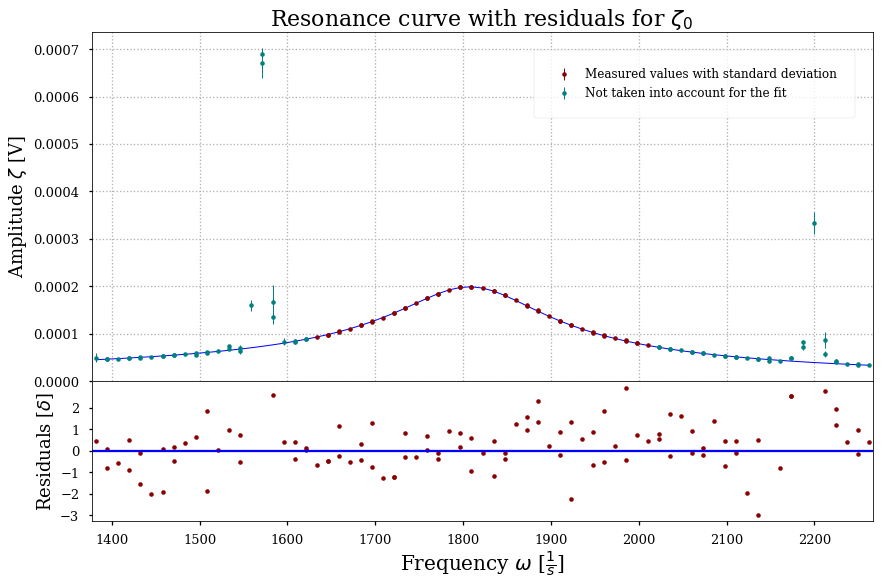

In [7]:
#Plotting the results for the amplitude 
fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw = {'height_ratios':[2.5, 1]})
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].errorbar(4*np.pi*freq0[33:84], amp0[33:84], yerr=amp0_dev[33:84], linewidth=1,linestyle='',marker='.',color='darkred',label='Measured values with standard deviation')
axs[0].errorbar(4*np.pi*freq0[:33], amp0[:33], yerr=amp0_dev[:33], linewidth=1,linestyle='',marker='.',color='teal',label='Not taken into account for the fit')
axs[0].errorbar(4*np.pi*freq0[84:], amp0[84:], yerr=amp0_dev[84:], linewidth=1,linestyle='',marker='.',color='teal')
axs[0].plot(4*np.pi*freq0, Lorentzian(4*np.pi*freq0, *popt_amp0), linewidth = 1, color = 'blue')


axs[0].set_title(r"Resonance curve with residuals for $\zeta_0$ ", size = 22)
axs[0].set_ylabel(r'Amplitude $\zeta$ [V]', size=18)
axs[0].grid(ls='dotted')
axs[0].legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')



axs[1].plot(4*np.pi*freq0_corrected, res0_corrected, color = 'darkred', linewidth=1, linestyle='',marker='.' )
axs[1].plot(np.linspace(1300,2300,2), np.zeros(2), color = 'blue')
axs[1].set_yticks(np.arange(-3, 3, 1))
axs[1].set_ylabel(r'Residuals [$\delta$]', size=18)
axs[1].set_xlabel(r'Frequency $\omega$ [$\frac{1}{s}$]', size=20)
axs[1].set_xlim(4*np.pi*freq0[0]-5, 4*np.pi*freq0[-1]+5)


#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu0_amplitude.pdf', format='PDF')
plt.show()

(-0.3, 3.141592653589793)

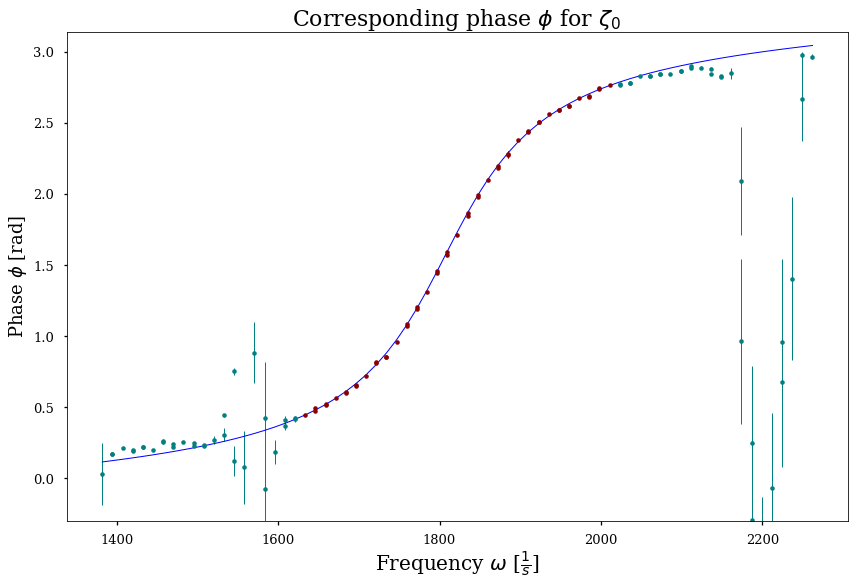

In [8]:
#Analyzing the corresponding phases
popt_ph0, pcov_ph0 = curve_fit(phi, 4*np.pi*freq0[33:84], phase0[33:84], sigma=phase0_dev[33:84], 
                               p0 = [ 175 ,  1812,  0, 0]) 

#Plotting the result
plt.errorbar(4*np.pi*freq0[33:84], phase0[33:84], yerr=phase0_dev[33:84], linewidth=1,linestyle='',marker='.',color='darkred',label='Measured values with standard deviation')
plt.errorbar(4*np.pi*freq0[:33], phase0[:33], yerr=phase0_dev[:33], linewidth=1,linestyle='',marker='.',color='teal',label='Not taken into account for the fit')
plt.errorbar(4*np.pi*freq0[84:], phase0[84:], yerr=phase0_dev[84:], linewidth=1,linestyle='',marker='.',color='teal')
plt.plot(4*np.pi*freq0, phi(4*np.pi*freq0, *popt_ph0), linewidth = 1, color = 'blue')


plt.title(r"Corresponding phase $\phi$ for $\zeta_0$ ", size = 22)
plt.xlabel(r'Frequency $\omega$ [$\frac{1}{s}$]', size=20)
plt.ylabel(r'Phase $\phi$ [rad]', size=18)
plt.ylim(-0.3, 1*np.pi)

### Analyzing the measurement for $\nu_1$

In [245]:
#Loading DATA
amp1, amp1_dev, phase1, phase1_dev, freq1 =  np.loadtxt(r'DATA/PartA/data1.txt', skiprows=1, unpack=True)

#Fitting the Lorentz curve
popt_amp1, pcov_amp1 = curve_fit(Lorentzian, 2*freq1[74:159], amp1[74:159], sigma=amp1_dev[74:159])

#Calculating the residuals (omitting other peaks)
res1 = residual(amp1, Lorentzian(2*freq1, *popt_amp1), amp1_dev)
res1_corrected = []
freq1_corrected = []

for index in range(len(res1)):
    if np.abs(res1[index]) < 10:
        res1_corrected.append(res1[index])
        freq1_corrected.append(freq1[index])                           
    else:
        pass
                               
res1_corrected = np.array(res1_corrected)
freq1_corrected = np.array(freq1_corrected)                               

In [246]:
#quality of the fit
print('We got the following results for nu1:')
print()

chi_squared1 = np.sum(res1)
print(r'chi^2 = ', chi_squared1)

dof1 = len(res1) - 3 
chi_squared1_red = chi_squared1 / dof1
print(r'chi^2_red = ', chi_squared1_red)

prob1 = round(1-chi2.cdf(chi_squared1,dof1),2)*100
print('P = ', prob1, ' %')

We got the following results for nu1:

chi^2 =  1158.72003238
chi^2_red =  4.00941187676
P =  0.0  %


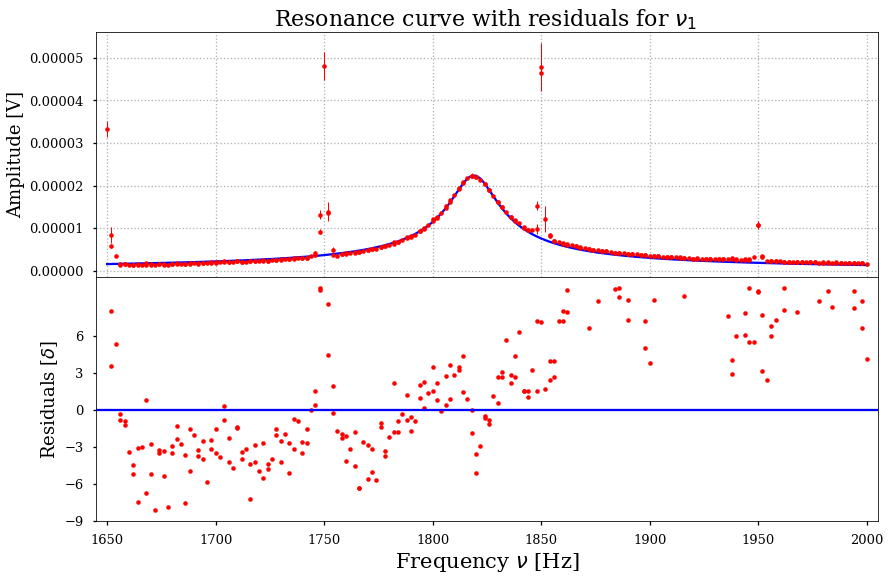

In [259]:
#Plotting the results for the amplitude 
fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)


# Plot each graph, and manually set the y tick values
axs[0].errorbar(2*freq1, amp1, yerr=amp1_dev, linewidth=1,linestyle='',marker='.',color='red',label='Measured values with standard deviation')
axs[0].plot(2*freq1, Lorentzian(2*freq1, *popt_amp1), color = 'blue')
axs[0].set_title(r"Resonance curve with residuals for $\nu_1$ ", size = 22)
axs[0].set_ylabel(r'Amplitude [V]', size=18)
axs[0].grid(ls='dotted')


axs[1].plot(2*freq1_corrected, res1_corrected, color = 'red', linewidth=1,linestyle='',marker='.' )
axs[1].plot(np.linspace(2*freq1[0]-5, 2*freq1[-1]+5,2), np.zeros(2), color = 'blue')
axs[1].set_yticks(np.arange(-9, 9, 3))
axs[1].set_ylabel(r'Residuals [$\delta$]', size=18)
axs[1].set_xlabel(r'Frequency $\nu$ [Hz]', size=21)
axs[1].set_xlim(2*freq1[0]-5, 2*freq1[-1]+5)

#plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu1_amplitude.pdf', format='PDF')
plt.show()

### Analyzing the measurement for $\nu_2$

In [21]:
#Loading DATA
amp2, amp2_dev, phase2, phase2_dev, freq2 =  np.loadtxt(r'DATA/PartA/data2.txt', skiprows=1, unpack=True)

#omit the other peaks for better fit results
peak_indices = [0, 38, 126, 127, 206, 207, 289, 371, 372, 373, 374, 375]

amp2_corrected = []
amp2_dev_corrected = []
freq2_corrected = []
for index in range(len(amp2)):
    if index not in peak_indices:
        amp2_corrected.append(amp2[index])
        amp2_dev_corrected.append(amp2[index])
        freq2_corrected.append(freq2[index])
    else: 
        pass 
    
amp2_corrected = np.array(amp2_corrected) 
freq2_corrected = np.array(freq2_corrected)
amp2_dev_corrected = np.array(amp2_dev_corrected) 

#Fitting the Lorentz curve
fitparams2 = [1, 5110, 1]
popt_amp2, pcov_amp2 = curve_fit(Lorentzian, 2*freq2_corrected, amp2_corrected, sigma = amp2_dev_corrected, p0 = fitparams2)


#Calculating the residuals (omitting other peaks)
res2 = residual(amp2_corrected, Lorentzian(2*freq2_corrected, *popt_amp2), amp2_dev_corrected)

res2_corrected = []
freq2_corrected = []

for index in range(len(res2)):
    if np.abs(res2[index]) < 3:
        res2_corrected.append(res2[index])
        freq2_corrected.append(freq2[index])                           
    else:
        pass
                               
res2_corrected = np.array(res2_corrected)
freq2_corrected = np.array(freq2_corrected) 

In [22]:
#quality of the fit
print('We got the following results for nu2:')
print()

chi_squared2 = np.sum(res2)
print(r'chi^2 = ', chi_squared2)

dof2 = len(res2) - 3 
chi_squared2_red = chi_squared2 / dof2
print(r'chi^2_red = ', chi_squared2_red)

prob2 = round(1-chi2.cdf(chi_squared2,dof2),2)*100
print('P = ', prob2, ' %')

We got the following results for nu2:

chi^2 =  3.2649590182
chi^2_red =  0.00904420780666
P =  100.0  %


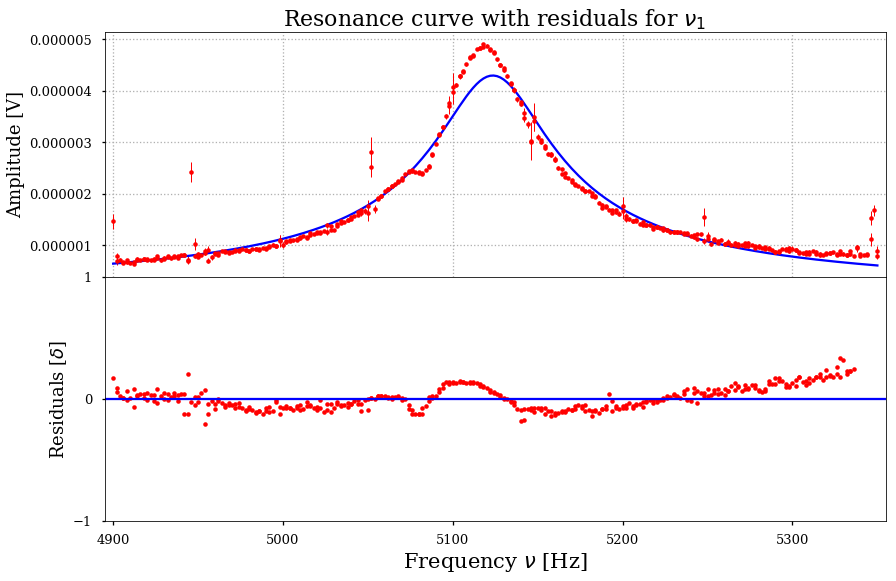

In [23]:
#Plotting the results for the amplitude 
fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].errorbar(2*freq2, amp2, yerr=amp2_dev, linewidth=1,linestyle='',marker='.',color='red',label='Measured values with standard deviation')
axs[0].plot(2*freq2, Lorentzian(2*freq2, *popt_amp2), color = 'blue')
axs[0].set_title(r"Resonance curve with residuals for $\nu_1$ ", size = 22)
axs[0].set_ylabel(r'Amplitude [V]', size=18)
axs[0].grid(ls='dotted')


axs[1].plot(2*freq2_corrected, res2_corrected, color = 'red', linewidth=1,linestyle='',marker='.' )
axs[1].plot(np.linspace(2*freq2[0]-5, 2*freq2[-1]+5,2), np.zeros(2), color = 'blue')
axs[1].set_yticks(np.arange(-1, 1.1, 1))
axs[1].set_ylabel(r'Residuals [$\delta$]', size=18)
axs[1].set_xlabel(r'Frequency $\nu$ [Hz]', size=21)
axs[1].set_xlim(2*freq2[0]-5, 2*freq2[-1]+5)

#plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu2_amplitude.pdf', format='PDF')
plt.show()

### Part B: Temperature dependency of the resonance frequency

We measured the resonance curve for $\nu_0$ for eleven different (increasing) temperatures. Iteratively we are using the same fit function as in part A to obtain the fit value of $\omega_{\text{res}}$. Then we plot the values we obtained as a function of a temperature to find the (hopefully linear) relationship between $\omega_{\text{res}}$ and $T$.

In [56]:
#Loading data, fitting the Lorentzian and extracting omega0 for all eleven temperature measurements
omega_res = []

for N in range(1,12):
    temp, temp_dev, amp, amp_dev, phase, phase_dev, freq = np.loadtxt(r'DATA/PartB/T{}.txt'.format(N), skiprows=1, unpack=True)
    #fitting data (already determined optimal fit range) 
    popt, pcov = curve_fit(Lorentzian, 4*np.pi*freq[42:98], amp[42:98], sigma=amp_dev[42:98])
    #appending 4-tuple with temp, temp_dev, omega_res, omega_res_dev
    omega_res.append((temp[0], temp_dev[0], popt[1], np.sqrt(pcov[1][1])))    

In [83]:
#Linear fit of the resulting dependency
def linear(T, m, y0):
    return m*T + y0

#Fitting all the measured points
popt_lin, pcov_lin = curve_fit(linear, [omega_res[i][0] for i in range(11)], 
                               [omega_res[i][2] for i in range(11)], sigma=[omega_res[i][1] for i in range(11)])

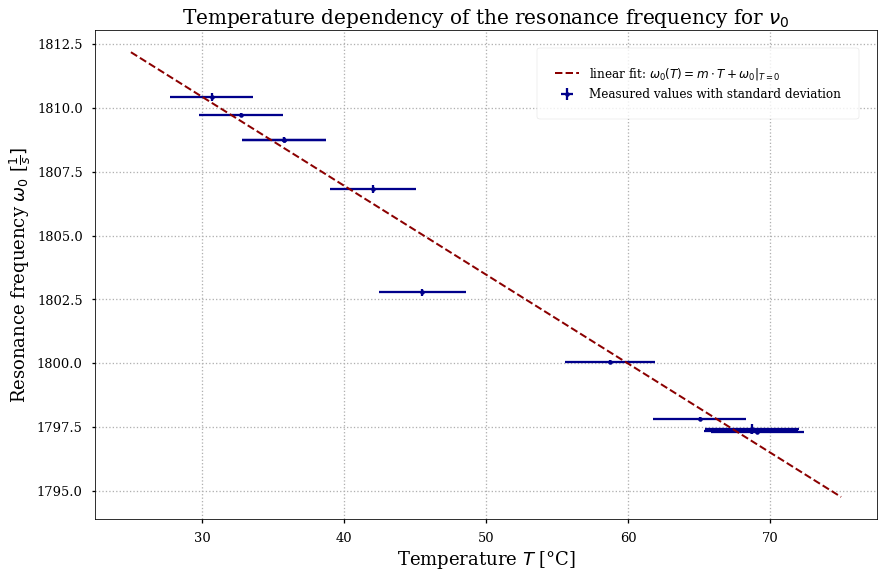

In [99]:
#Plotting the result 
plt.errorbar([omega_res[i][0] for i in range(11)], [omega_res[i][2] for i in range(11)],
              xerr = [omega_res[i][1] for i in range(11)], yerr = [omega_res[i][3] for i in range(11)],
              linestyle ='', marker='.',color='darkblue', label='Measured values with standard deviation')
plt.plot(np.linspace(25,75,2), linear(np.linspace(25,75,2), *popt_lin), linestyle = '--', lw = 2 ,color = 'darkred',
         label = r'linear fit: $\omega_0(T) = m\cdot T + \omega_0|_{T=0}$ ')

plt.title(r'Temperature dependency of the resonance frequency for $\nu_0$', size = 20)
plt.xlabel(r'Temperature $T$ [°C]', size = 18)
plt.ylabel(r'Resonance frequency $\omega_0$ [$\frac{1}{s}]$', size = 18)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.grid(ls='dotted')